<a href="https://colab.research.google.com/github/upwind1993/Numerical-Analysis/blob/main/17%EC%9E%A5/17%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

예제 17.1

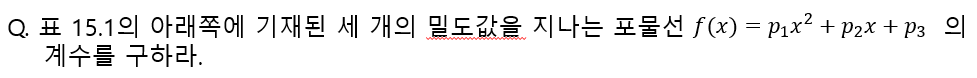

In [36]:
import numpy as np
T = np.array([300., 400., 500.])
rho = np.array([0.616, 0.525, 0.457])
coef = np.polyfit(T,rho,2)
print(coef)


[ 1.150e-06 -1.715e-03  1.027e+00]


In [37]:
dens = np.polyval(coef,350.)
print('{0:7.5g}'.format(dens))


0.56762


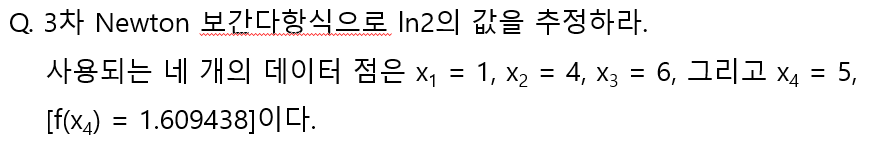

In [44]:
def Newtint(x,y,xx):
    """
    Newtint: Newton interpolating polynomial
    Uses an (n−1)th−order Newton interpolating polynomial
    based on n data pairs to return a value of the
    dependent variable, yint, at a given value of the
    independent variable, xx.
    Input:
        x = array of independent variable values
        y = array of dependent variable values
        xx = value of independent variable at which
             the interpolation is calculated
    Output:
        yint = interpolated value of the dependent variable
 """
 # compute the finite divided differences in the
 # form of a difference table
    n = len(x)
    if len(y) != n:
        return 'x and y must be of same length'
    b = np.zeros((n,n))
    # assign the dependent variables to the first column of b
    b[:,0] = np.transpose(y)
    for j in range(1,n):
      for i in range(n-j):
        b[i,j] = (b[i+1,j-1]-b[i,j-1])/(x[i+j]-x[i])
  # use the finite divided differences to interpolate
    xt = 1
    yint = b[0,0]
    for j in range(n-1):
      xt = xt * (xx - x[j])
      yint = yint + b[0,j+1]*xt
    return yint
# Example usage
x = np.array([1., 4., 6., 5.])
y = np.log(x)
yi = Newtint(x, y, 2.)
print(yi)

0.6287685789084135


예제 17.4

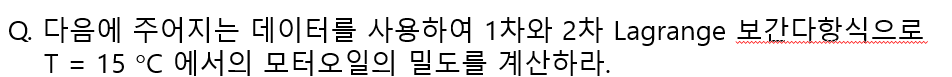

In [45]:
def Lagrange(x,y,xx):
    """
    Lagrange interpolating polynomial
    Uses an (n−1)th−order Lagrange interpolating polynomial
    based on n data pairs to return a value of the
    dependent variable, yint, at a given value of the
    independent variable, xx.
    Input:
        x = array of independent variable values
        y = array of dependent variable values
        xx = value of independent variable at which
             the interpolation is calculated
    Output:
        yint = interpolated value of the dependent variable
    """
    n = len(x)
    if len(y) != n:
        return 'x and y must be of same length'
    s = 0
    for i in range(n):
        product = y[i]
        for j in range(n):
            if i != j:
                product = product * (xx - x[j])/(x[i]-x[j])
        s = s + product
    yint = s
    return yint

T = np.array([-40., 0., 20., 50.])
rho = np.array([1.52, 1.29, 1.2, 1.09])
rhoint = Lagrange(T,rho,15.)
print(rhoint)

1.2211284722222222


예제 17.5

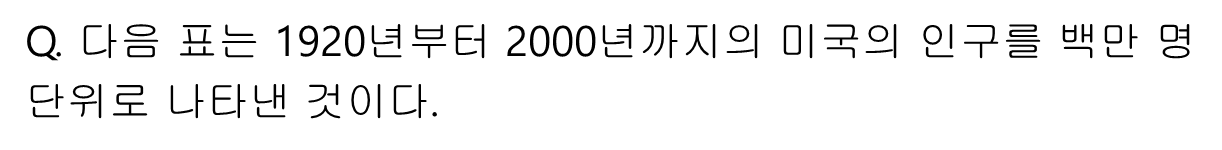

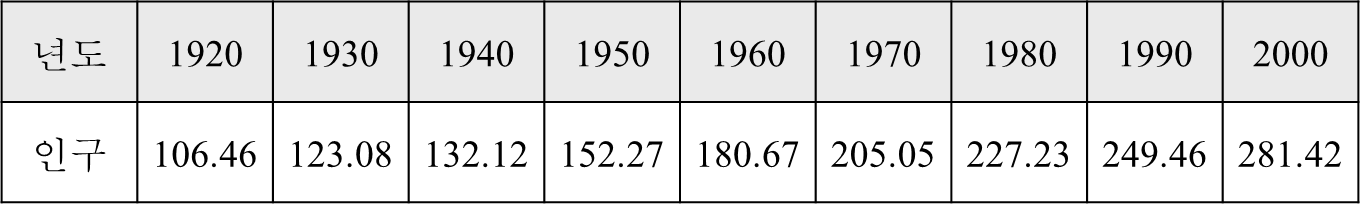

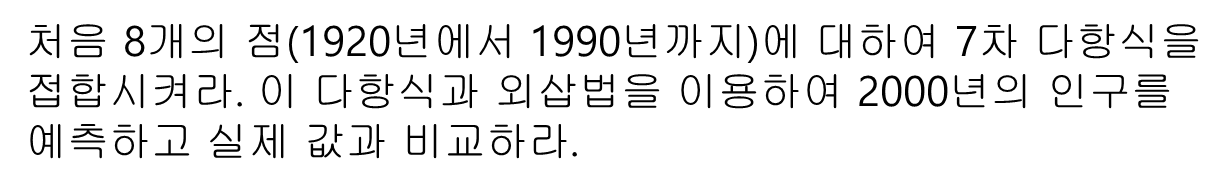

In [ ]:
import numpy as np

yr = np.arange(1920.,2020.,10.)
pop = np.array([106.02,123.2,132.17,151.33,179.32,203.21,226.55,248.71,281.42,308.75])

coef = np.polyfit(yr,pop,7)
np.set_printoptions(precision=5)
print(coef)

[-3.37441e-12  3.31708e-08 -1.17342e-04  1.27823e-01  2.53437e+02
 -8.94392e+05  9.76304e+08 -3.83759e+11]


<ipython-input-5-38dd0237c96e>:6: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(yr,pop,7)


In [ ]:
z = (yr-1965.)/30
coef = np.polyfit(z,pop,9)
np.set_printoptions(precision=5)
print(coef)

[ -18.12465   -2.0495    79.56966   -1.04477 -105.68631   23.29964
   40.06379  -16.82524   70.63697  191.71441]


In [ ]:
z20 = (2020.-1965.)/30.
pop20 = np.polyval(coef,z20)
print('{0:7.2f}'.format(pop20))

-417.05


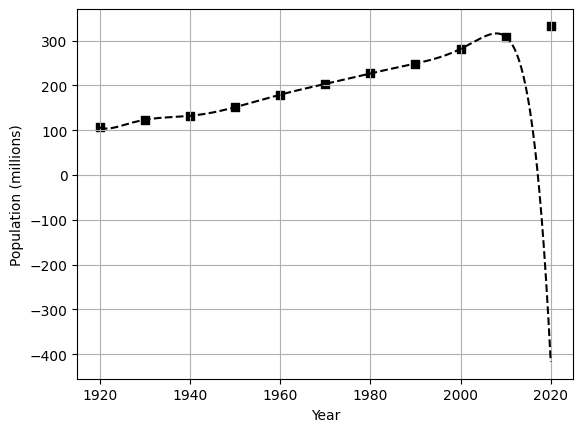

In [ ]:
import pylab
import numpy as np

yr2 = np.append(yr, [2020.])
pop2 = np.append(pop, [332.64])
yrplot = np.linspace(1920., 2020., 200)
zplot = (yrplot - 1965.) / 30.
pop2plot = np.polyval(coef, zplot)  # Corrected from np.ployval to np.polyval
pylab.scatter(yr2, pop2, c='k', marker='s')
pylab.plot(yrplot, pop2plot, c='k', ls='--')
pylab.grid()
pylab.xlabel('Year')
pylab.ylabel('Population (millions)')
pylab.show()


예제 17.6

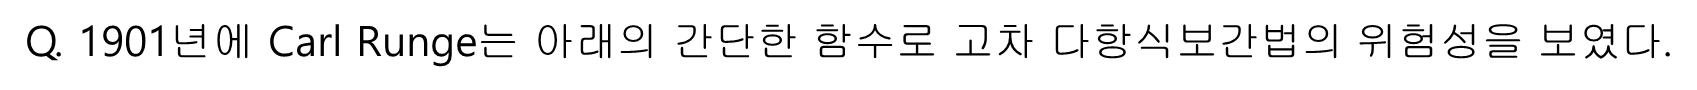 <br>

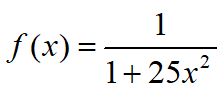 <br>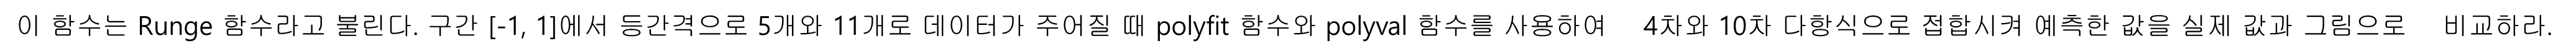


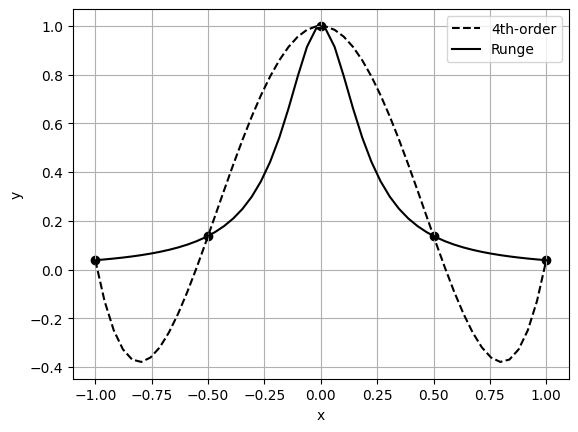

In [ ]:
import numpy as np
import pylab

#generate 5 eqally-spaced points and function values
x = np.linspace(-1.,1.,5)
y = 1./(1.+25.*x**2)
# 50 interpolation point
xx = np.linspace(-1.,1.)
# fit 4th-order polynomial
coef = np.polyfit(x,y,4)
#use polynomial to interpolate
y4 = np.polyval(coef,xx)
# Runge's function values
yr = 1./(1.+25.*xx**2)
#generate plot
pylab.scatter(x,y,c='k',marker='o')
pylab.plot(xx,y4,c='k',ls='--',label='4th-order')
pylab.plot(xx,yr,c='k',label='Runge')
pylab.grid()
pylab.xlabel('x')
pylab.ylabel('y')
pylab.legend()
pylab.show()


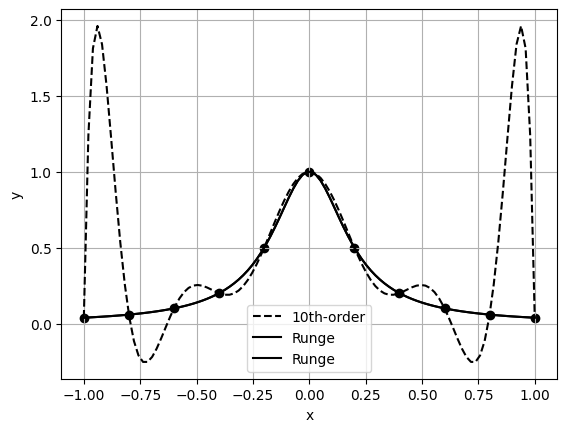

In [ ]:
import numpy as np
import pylab
#generate 11 equally-spaced points and function values
x = np.linspace(-1.,1.,11)
y = 1./(1.+25.*x**2)
#100 interpolation points
xx = np.linspace(-1.,1.,100)
#fit 4th-order polynomial
coef = np.polyfit(x,y,10)
#use polynomial to interpolate
y10 = np.polyval(coef,xx)
# Runge's function values
yr = 1./(1.+25.*xx**2)
#generate plot
pylab.scatter(x,y,c='k',marker='o')
pylab.plot(xx,y10,c='k',ls='--',label='10th-order')
pylab.plot(xx,yr,c='k',label='Runge')

pylab.plot(xx,yr,c='k',label='Runge')
pylab.grid()
pylab.xlabel('x')
pylab.ylabel('y')
pylab.legend()
pylab.show()